In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
fids, inputs, labels, embeds = pickle.load(open("tbakd3_npy/5folds/4/embs/dwac_train_emb10.pkl", "rb"))

In [3]:
z = embeds.copy()
norm = (z ** 2).sum(axis=1)
dists = ((-2 * np.matmul(z, z.T) + norm).T + norm).T
dists = dists * (1 - np.eye(len(dists)))

i0 = np.where(labels == 0)[0]
i1 = np.where(labels == 1)[0]
p0 = i0[dists[i0][:,i1].sum(axis=-1).argmax()]
p1 = i1[dists[i1][:,i0].sum(axis=-1).argmax()]

p00, p01 = np.argpartition(dists[p0], 1)[1], dists[p0].argmax()
p10, p11 = np.argpartition(dists[p1], 1)[1], dists[p1].argmax()

[p0, p00, p01, p1, p11, p10], fids[p0, p00, p01, p1, p11, p10], labels[[p0, p00, p01, p1, p11, p10]]

array([0, 0, 1, 1, 0, 1])

In [4]:
findings = pickle.load(open("tbakd3_npy/findings.pkl", "rb"))
rfindings = pickle.load(open("tbak_rfids.pkl", "rb"))
q2l = {'t2_tse_tra':'T', 'CALC_BVAL': 'B', 'diff_ADC': 'A', 'Ktrans': 'K'}
l2q = {'T':'t2_tse_tra', 'B':'CALC_BVAL', 'A':'diff_ADC', 'K': 'Ktrans'}

def get_vis(rfids, zfids, f):
    fig, ax = plt.subplots(2, 4, figsize=(18, 9))
    for i, q in enumerate('TBAK'):
        arr = rfids[f][q]['array']
        zoom = zfids[f][l2q[q]]
        ij = rfids[f][q]['ijk'][:2]
        ax[0, i].imshow(arr, cmap='gray')
        ax[0, i].annotate("",
            xy=(ij[1] + arr.shape[0] * 0.03, ij[0] + arr.shape[0] * 0.03), xycoords='data',
            xytext=(ij[1] + arr.shape[0] * 0.1, ij[0] + arr.shape[0] * 0.1), textcoords='data',
            arrowprops=dict(
                # arrowstyle="->",
                width=0.5,
                headwidth=7,
                color="red",
                # size=3,
                # connectionstyle="arc3"
                ),
            )
        ax[0, i].set_title(['T2', 'BVAL', 'ADC', 'Ktrans'][i])
        ax[1, i].imshow(zoom, cmap='gray')
        ax[1, i].annotate("",
            xy=(32 + 3, 32 + 3), xycoords='data',
            xytext=(32 + 8, 32 + 8), textcoords='data',
            arrowprops=dict(
                width=0.5,
                headwidth=7,
                color="red",
            ),
        )
    ax[0, 0].set_ylabel("original ~180mm")
    ax[1, 0].set_ylabel("zoomed-in 64mm")
    fig.suptitle(f)
    return fig

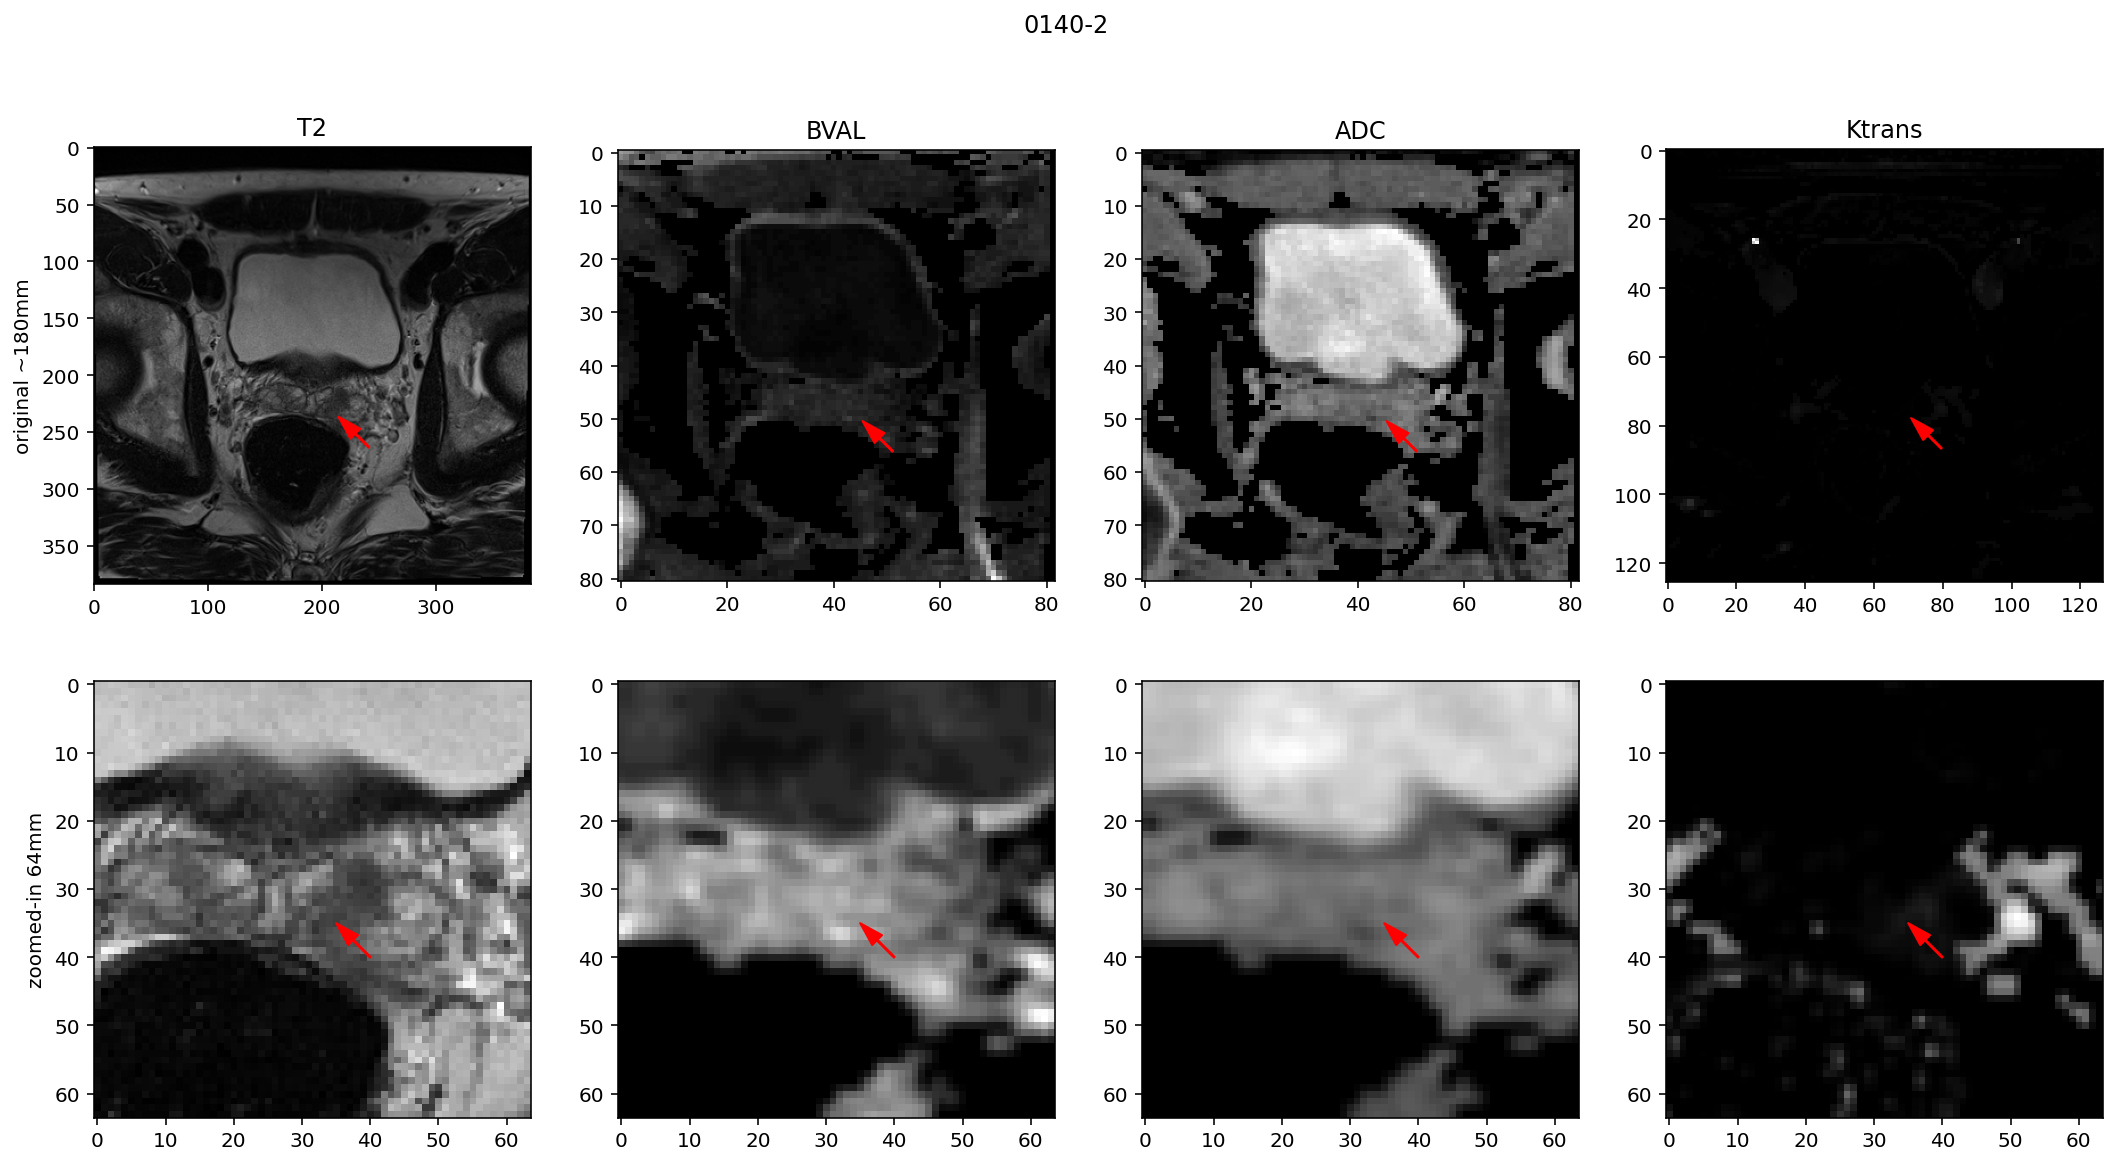

In [5]:
fig = get_vis(rfindings, findings, fids[p0])
fig.show()

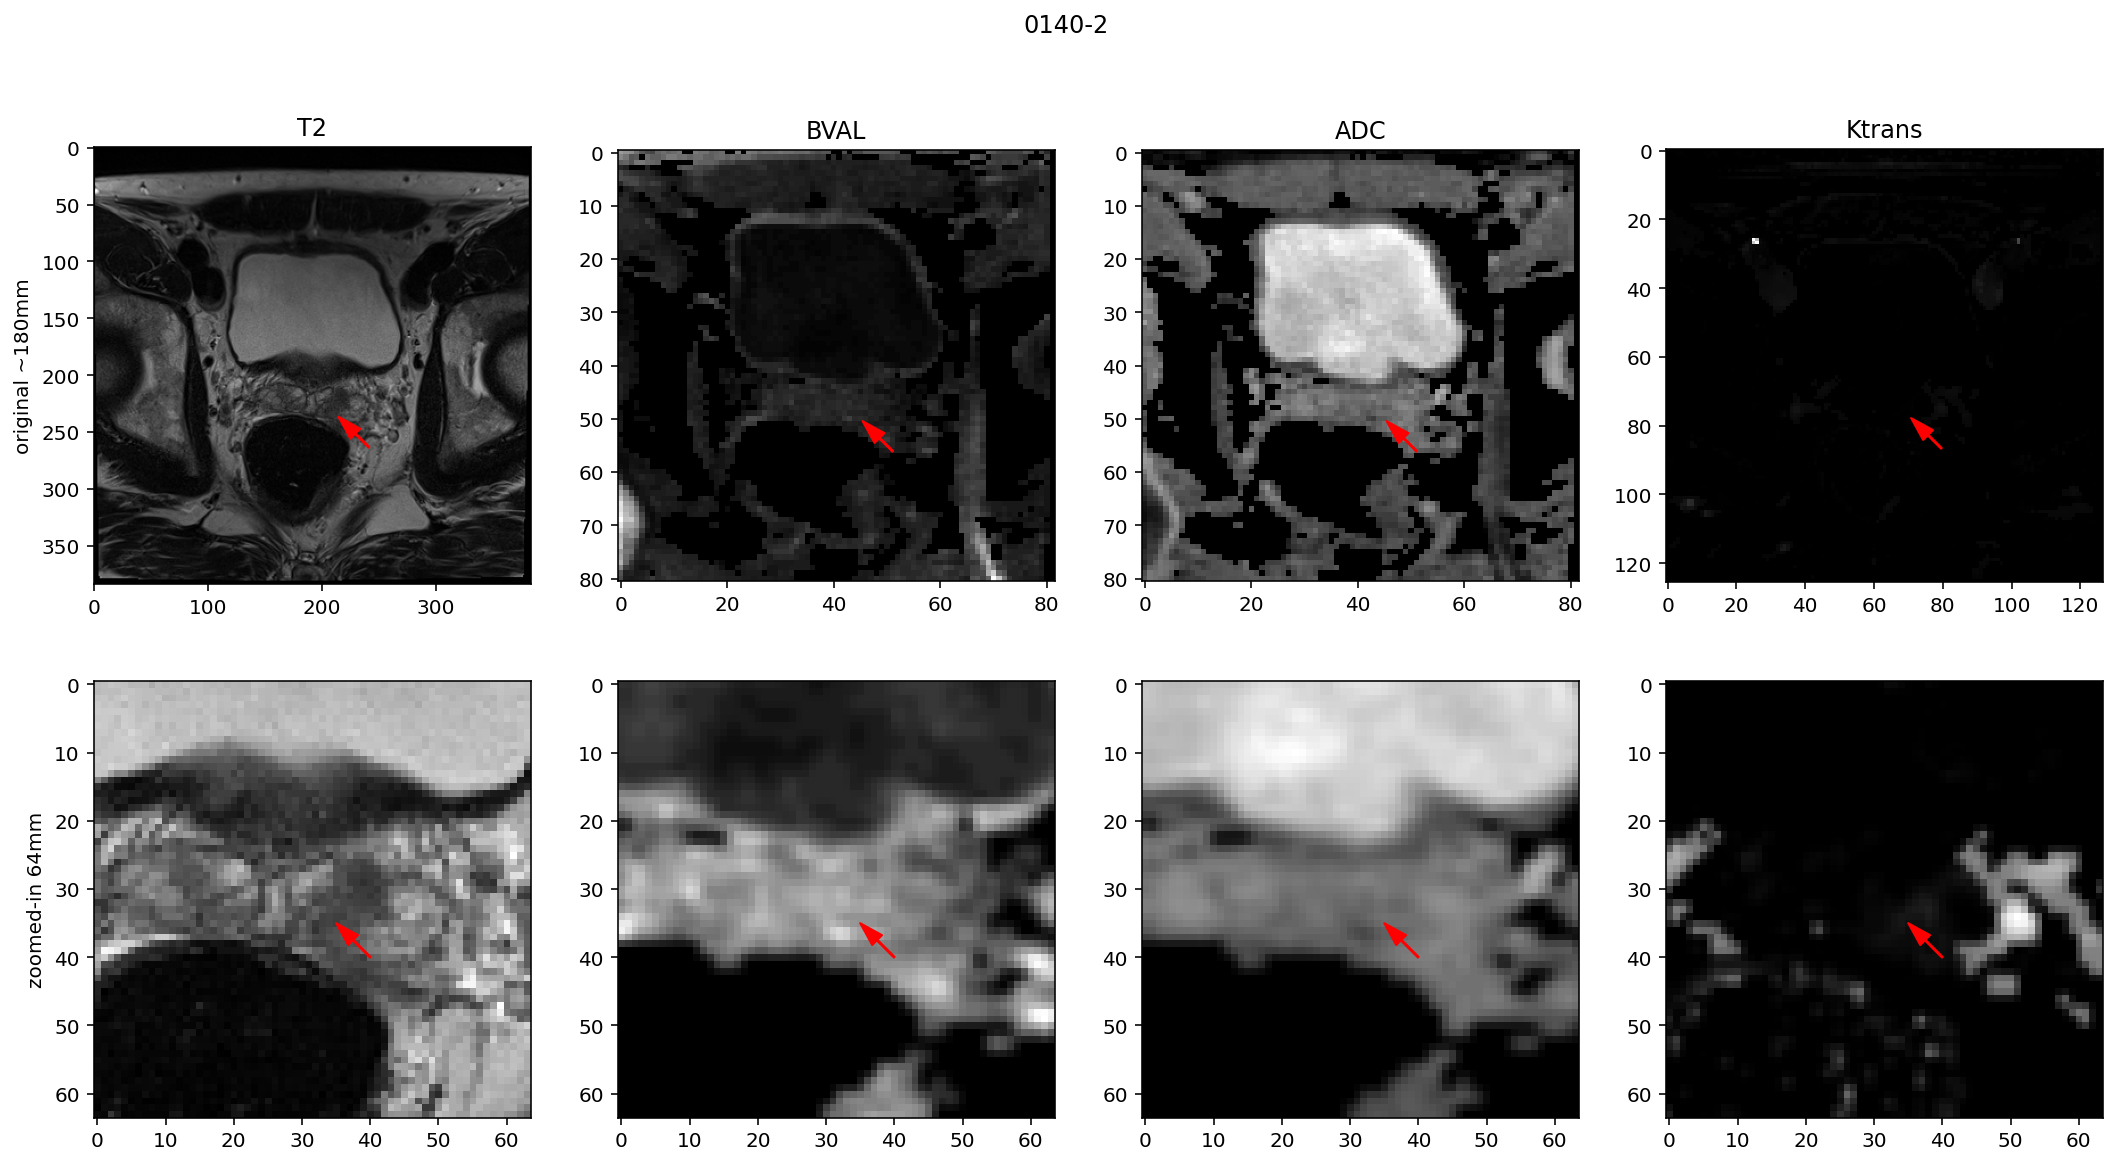

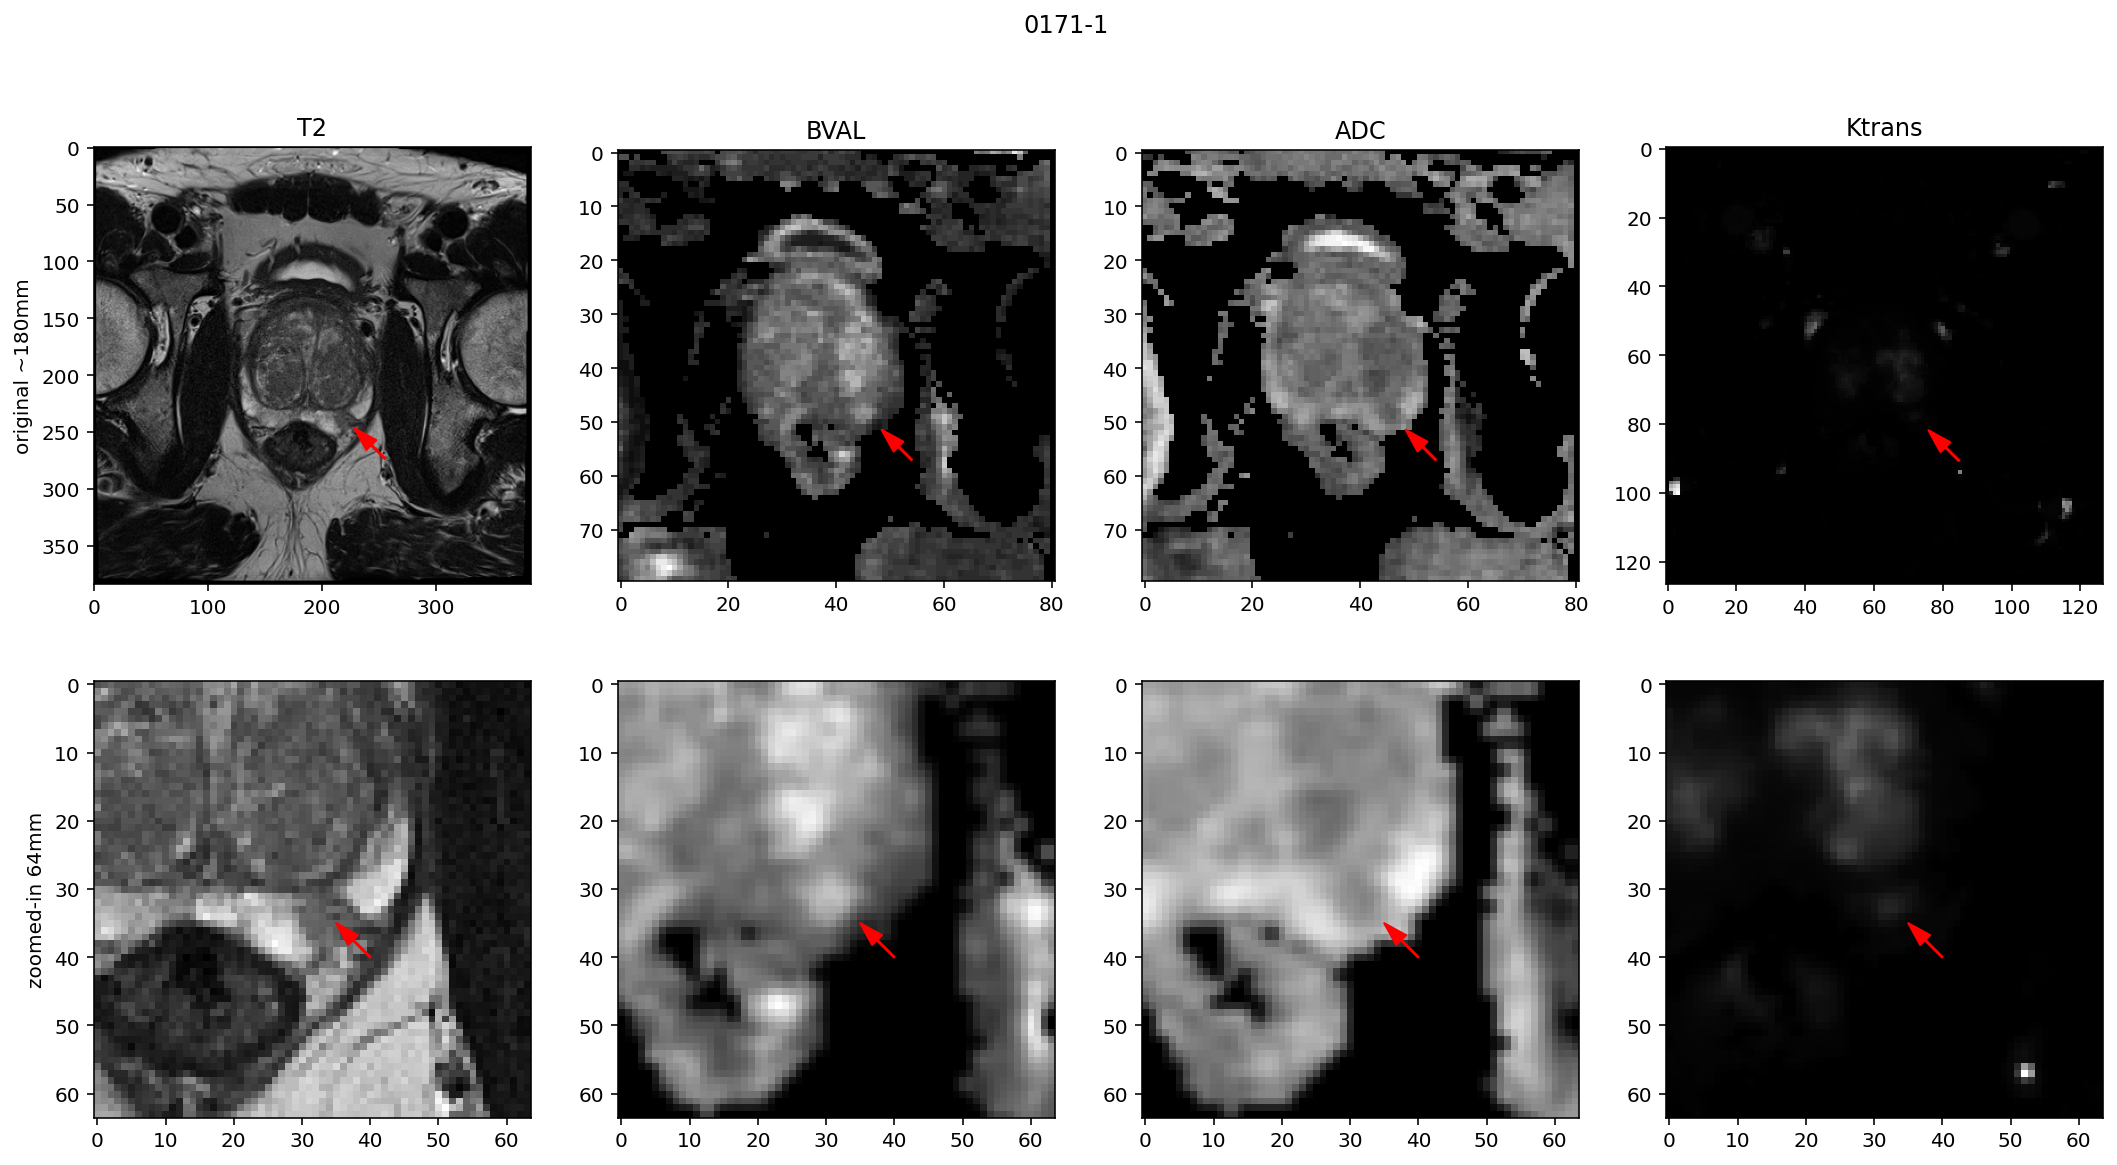

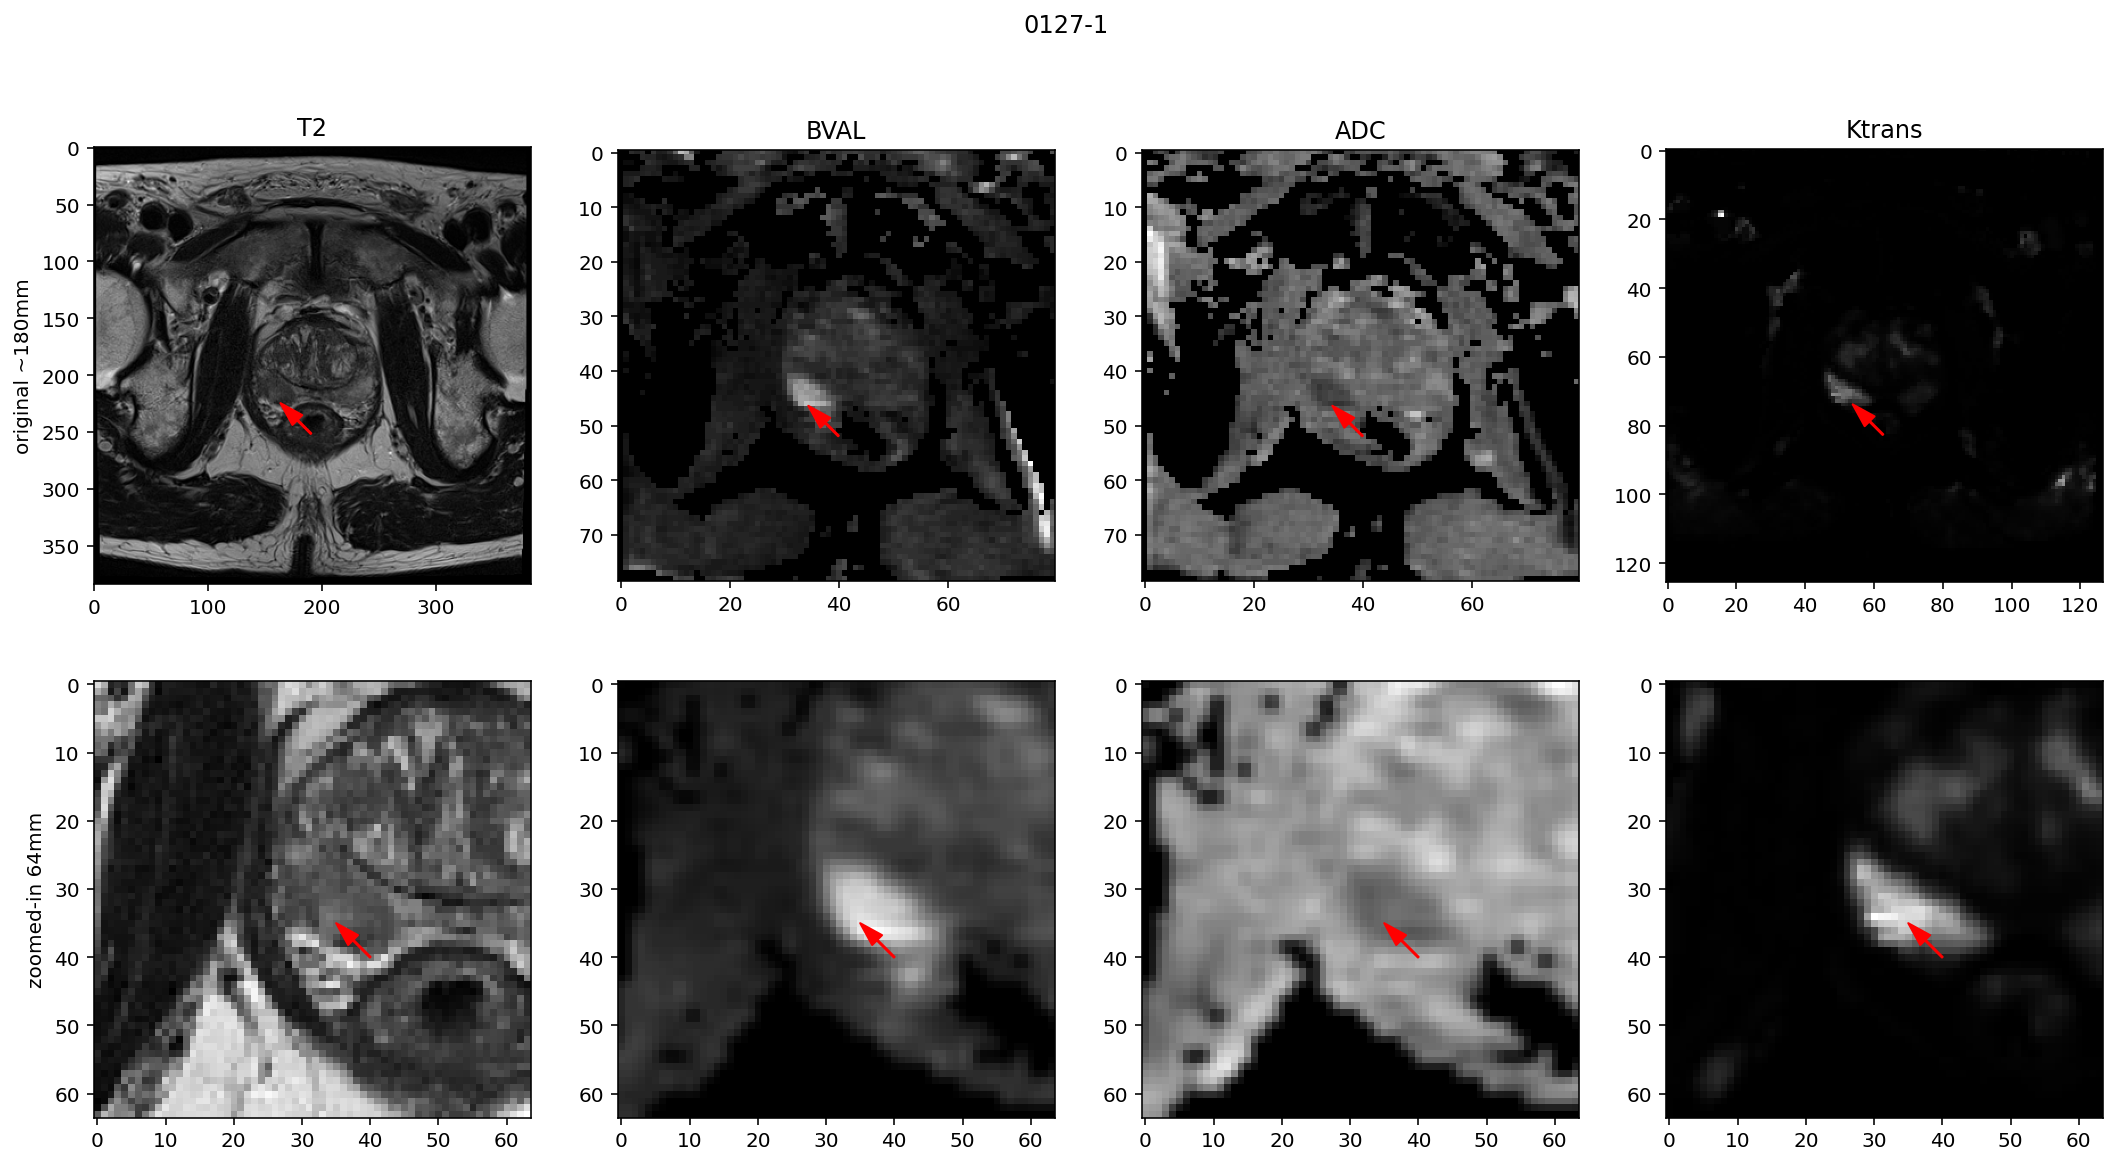

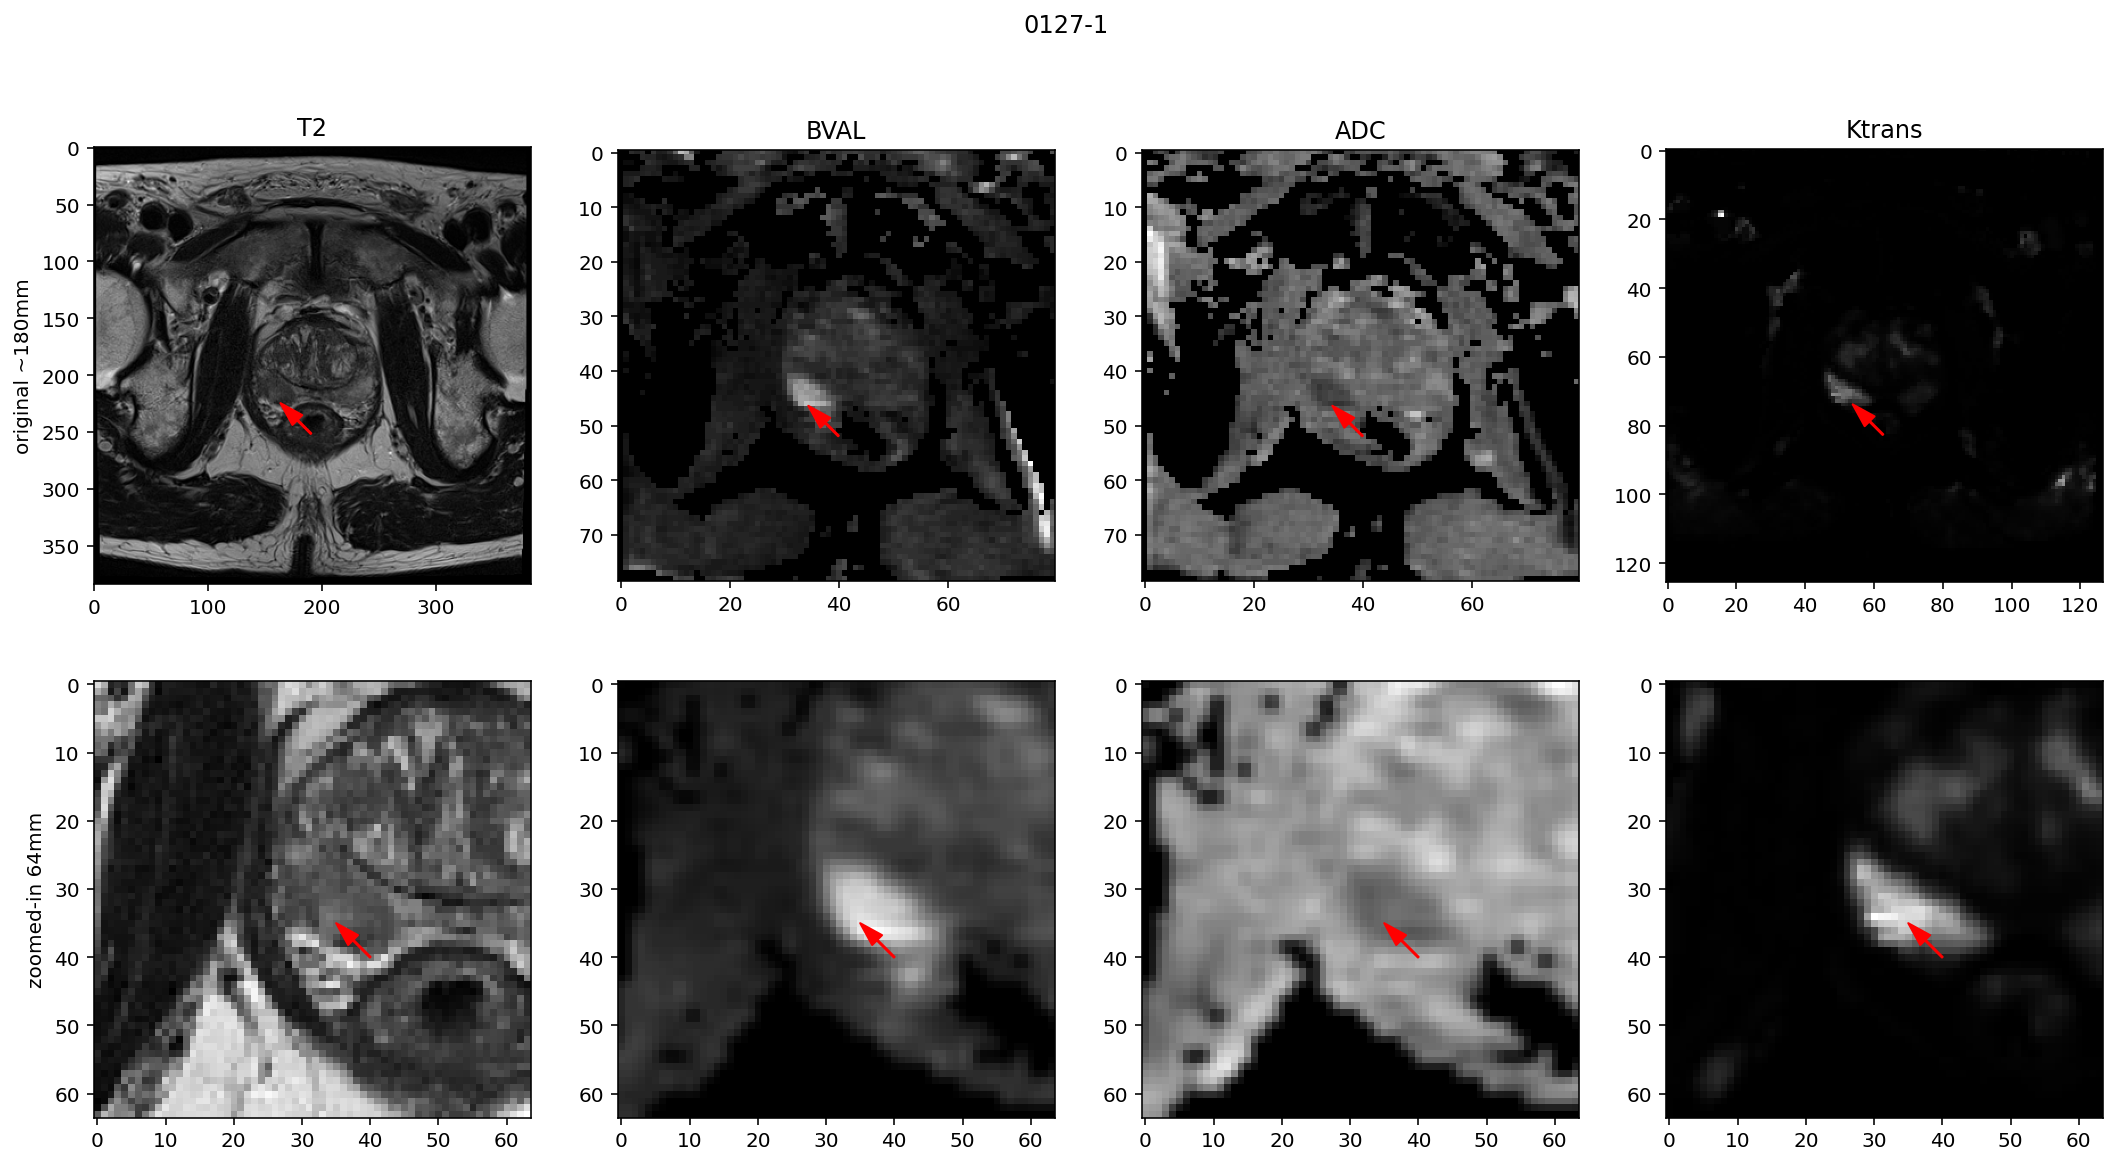

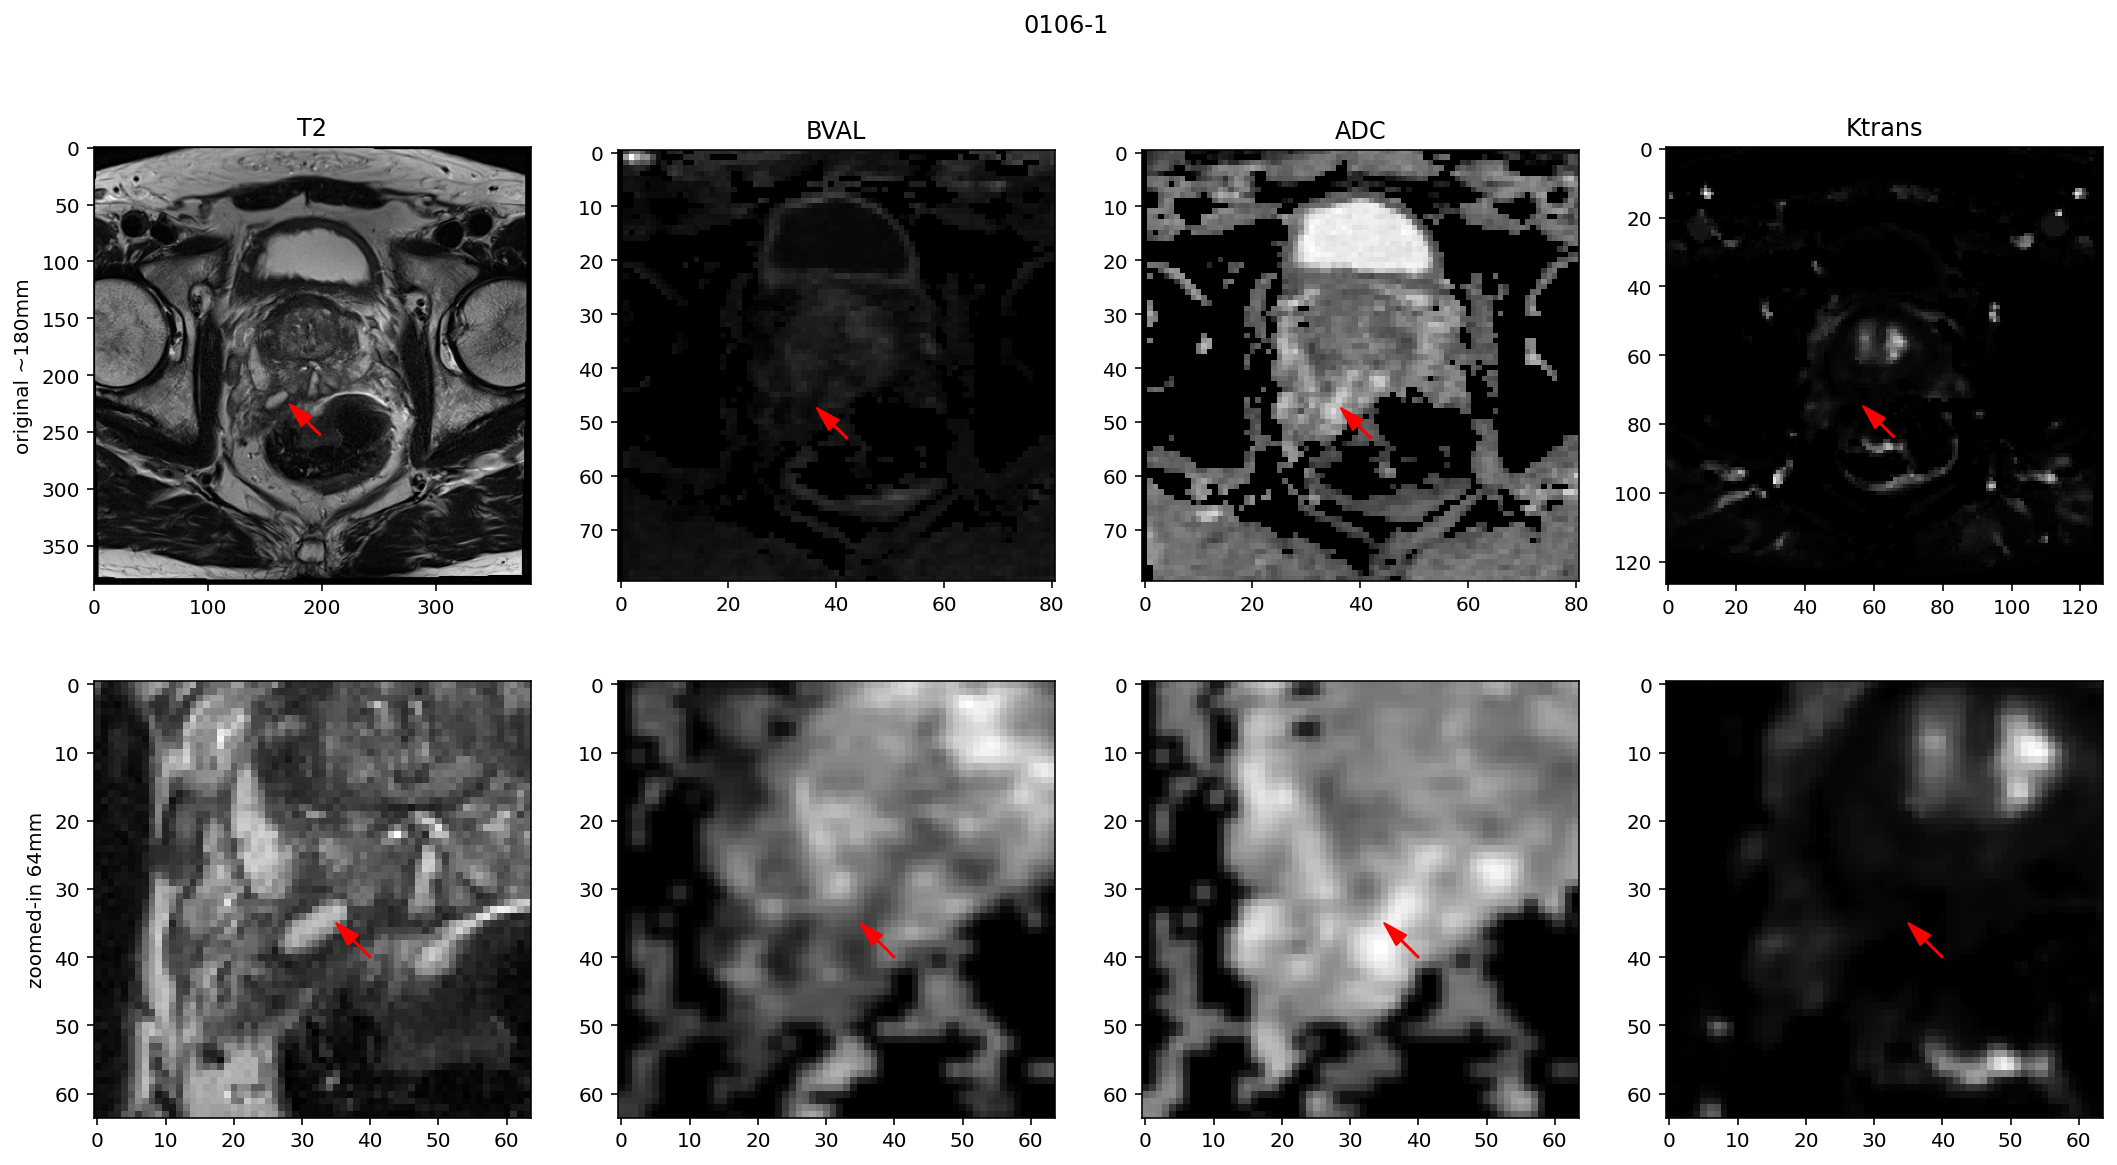

In [6]:
for p in [p0, p00, p01, p1, p11, p10]:
    fig = get_vis(rfindings, findings, fids[p])
    fig.show()